<a href="https://colab.research.google.com/github/uuu4/DataScienceEcosystem/blob/main/Updated_Horses_or_Humans_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horses or Humans Classification with TensorFlow
Bu çalışma, TensorFlow kullanarak *Horses or Humans* veri setini sınıflandırma problemine odaklanır.

### Kütüphanelerin Yüklenmesi
TensorFlow, TensorFlow Datasets, Matplotlib gibi gerekli kütüphaneler yükleniyor.

In [1]:

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Veri setinin indirilmesi
Veri seti tensorflow_datasetsten alınmış olup herkesin kullanımına açıktır.

In [ ]:
# Veri setini indirme ve yükleme
ds_train, ds_test = tfds.load(
    'horses_or_humans',
    split=['train', 'test'],
    as_supervised=True
)


Önişleme işlemleri yapılır.

In [3]:
# Veri ön işleme
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 32
ds_train = ds_train.map(normalize_img).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

### Model Tanımlaması ve Eğitimi
Bu hücrede model tanımlaması ve eğitim yapılır, en sonunda binary(ikili) sınıflandırma yapılacaktır.(Atlar ve insanlar)

In [ ]:
# Model tanımlama
# NOT : Model eğitimi Google Colab ücretsiz sürümü ile yaklaşık 9 dakika sürüyor.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model eğitimi
history = model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test
)

### Confusion Matrix
Modelin performansını ölçmek için tahmin edilen değerlerle gerçek değerleri karşılaştırarak bir confusion matrix oluşturulacak.

In [ ]:

# Confusion matrix için tahminler ve gerçek etiketlerin toplanması
y_true = []
y_pred = []
for img, label in ds_test.unbatch().as_numpy_iterator():
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)[0][0]
    predicted_label = 1 if prediction > 0.5 else 0
    y_true.append(label)
    y_pred.append(predicted_label)

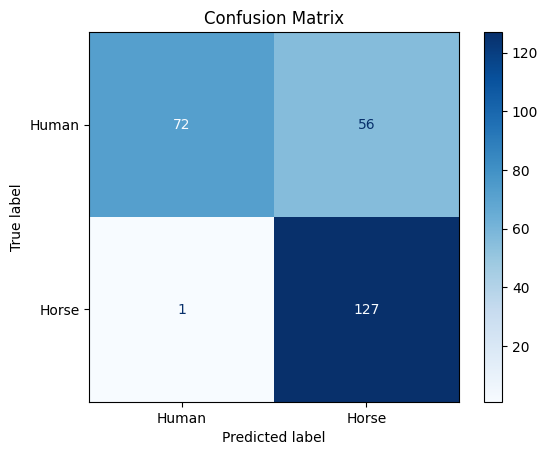

True Positive (TP): 127
False Positive (FP): 56
False Negative (FN): 1
True Negative (TN): 72


In [9]:
# Confusion matrix hesaplama ve görselleştirme
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human", "Horse"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
# TT, TF, FT, FF değerlerini ekrana yazdırma
tn, fp, fn, tp = cm.ravel()
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")


### Sonuçlar ve Analiz
Sonuçlar, modelin doğruluğu ve genel performansı üzerinde yorum yapılarak analiz edilecektir.

### Ek Metriklerin Hesaplanması
Bu hücrede modelin performansını daha iyi anlamak için **accuracy**, **precision**, **recall** ve **F1-score** gibi metrikler hesaplanır.

In [11]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Validation Accuracy
val_accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Precision
precision = precision_score(y_true, y_pred, average='binary')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true, y_pred, average='binary')
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_true, y_pred, average='binary')
print(f"F1-Score: {f1:.4f}")


Validation Accuracy: 0.7773
Precision: 0.6940
Recall: 0.9922
F1-Score: 0.8167



- Modelimiz *Horses or Humans* veri seti üzerinde eğitildi ve test edildi.
- Sonuçlara bakıldığında test doğruluğunun makul seviyede olduğu görülüyor.
- Confusion Matrix, modelin doğru ve yanlış sınıflandırmalarını görmemizi sağladı.
- Daha yüksek doğruluk elde etmek için daha derin bir model, daha fazla epoch ya da veri artırma (data augmentation) gibi yöntemler kullanılabilir.
